In [1]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
def three_diagonal_matrix(diag_a, diag_b, diag_c, function):
    n = len(diag_a)
    y = [0] * n
    c, d = [diag_c[0] / diag_b[0]], [function[0] / diag_b[0]]
    for i in range(1, n):
        c.append(diag_c[i] / (diag_b[i] - diag_a[i] * c[i - 1]))
        d.append((-diag_a[i] * d[i - 1] + function[i]) / (diag_b[i] - diag_a[i] * c[i - 1]))

    y[-1] = d[-1]
    for i in reversed(range(n - 1)):
        y[i] = -c[i] * y[i + 1] + d[i]

    return y

###### Приклад 1

In [3]:
l1 = 1
l2 = 1
T = 1
u_0 = "3 * np.cos(x + 7) * np.cos(2 * y + 3)"
g_0yt = "3 * np.cos(7) * np.cos(2 * y + 3) * np.exp(-2.5 * t)"
g_1yt = "3 * np.cos(1 + 7) * np.cos(2 * y + 3) * np.exp(-2.5 * t)"
g_x0t = "3 * np.cos(x + 7) * np.cos(3) * np.exp(-2.5 * t)"
g_x1t = "3 * np.cos(x + 7) * np.cos(2 + 3) * np.exp(-2.5 * t)"
mu = 0.1
h1 = 0.1
h2 = 0.1
tau = 0.1
analytic = "3 * np.cos(x + 7) * np.cos(2 * y + 3) * np.exp(-2.5 * t)"

###### Приклад2

In [4]:
l1 = 1
l2 = 1
T = 1
u_0 = "np.cos(x) * np.cos(y)"
g_0yt = "np.cos(0) * np.cos(y) * np.exp(-2 * t)"
g_1yt = "np.cos(1) * np.cos(y) * np.exp(-2 * t)"
g_x0t = "np.cos(x) * np.cos(0) * np.exp(-2 * t)"
g_x1t = "np.cos(x) * np.cos(1) * np.exp(-2 * t)"
mu = 2
h1 = 0.1
h2 = 0.1
tau = 0.5
analytic = "np.cos(x)*np.cos(y)*np.exp(-2 * t)"

######  Приклад 3

In [5]:
l1 = 2
l2 = 2
T = 2
u_0 = "np.cos(x) * np.cos(y)"
g_0yt = "np.cos(0)*np.sinh(y)*np.exp(-4 * t)"
g_1yt = "np.cos(1)*np.sinh(y)*np.exp(-4 * t)"
g_x0t = "np.cos(x)*np.sinh(0)*np.exp(-4 * t)"
g_x1t = "np.cos(x)*np.sinh(1)*np.exp(-4 * t)"
mu = 0.5
h1 = 0.1
h2 = 0.1
tau = 0.5
analytic = "np.cos(x)*np.sinh(y)*np.exp(-4 * t)"

In [6]:
def u_0_function(x, y):
    return eval(str(u_0))


def g_0yt_function(y, t):
    #x=0
    return eval(str(g_0yt))


def g_1yt_function(y, t):
    #x=1
    return eval(str(g_1yt))


def g_x0t_function(x, t):
    #y=0
    return eval(str(g_x0t))


def g_x1t_function(x, t):
    #y=1
    return eval(str(g_x1t))


def analytic_function(x, y, t):
    return eval(str(analytic))

In [7]:
# for 8 equation
def l_2(ys, mu, h):
    res = []
    for n in range(1, N2 + 2):
        res.append(mu * (ys[n + 1] - 2 * ys[n] + ys[n - 1]) / h ** 2)
    return res

In [8]:
# initialising variables
def variables(l1, l2, h1, h2, t, tau):
    N1 = int(l1 / h1)
    N2 = int(l2 / h2)
    M = int(T / tau)
    return N1, N2, M

N1, N2, M = variables(l1, l2, h1, h2, T, tau)

In [9]:
def xs_ys_ts():
    xs = [i * h1 for i in range(N1 + 1)]
    ys = [i * h2 for i in range(N2 + 1)]
    ts = [i * tau for i in range(M + 1)]
    return xs, ys, ts
xs, ys, ts = xs_ys_ts()

In [10]:
u_0 = [[u_0_function(x, y) for y in ys] for x in xs]
g_0yt = [[g_0yt_function(y, t) for t in ts] for y in ys]
g_1yt = [[g_1yt_function(y, t) for t in ts] for y in ys]
g_x0t = [[g_x0t_function(x, t) for t in ts] for x in xs]
g_x1t = [[g_x1t_function(x, t) for t in ts] for x in xs]

analytic = [[[analytic_function(x, y, t) for t in ts] for y in ys] for x in xs]

u_1 = [[[0 for j in ts] for n in ys] for m in xs]
u_2 = [[[0 for j in ts] for n in ys] for m in xs]

In [11]:
# adding initial and boundary values
for m in range(N1 + 1):
    for n in range(N2 + 1):
        u_1[m][n][0] = u_0[m][n]
        u_2[m][n][0] = u_0[m][n]

print("End first")

for n in range(N2 + 1):
    for j in range(M + 1):
        u_1[0][n][j] = g_0yt[n][j]
        u_1[-1][n][j] = g_1yt[n][j]
        u_2[0][n][j] = g_0yt[n][j]
        u_2[-1][n][j] = g_1yt[n][j]
        
print("End second")

for m in range(N1 + 1):
    for j in range(M + 1):
        u_1[m][0][j] = g_x0t[m][j]
        u_1[m][-1][j] = g_x1t[m][j]
        u_2[m][0][j] = g_x0t[m][j]
        u_2[m][-1][j] = g_x1t[m][j]
        
print("End third")

End first
End second
End third


In [12]:
# equation 4
for j in range(M):
    for m in range(1, N1):
        for n in range(1, N2):
            part1 = (u_1[m - 1][n][j] - 2 * u_1[m][n][j] + u_1[m + 1][n][j]) / h1 ** 2
            part2 = (u_1[m][n - 1][j] - 2 * u_1[m][n][j] + u_1[m][n + 1][j]) / h2 ** 2
            u_1[m][n][j + 1] = tau * mu * (part1 + part2) + u_1[m][n][j]

# equation 8-9
k1 = mu * tau / (2 * h1 ** 2)
k2 = mu * tau / (2 * h2 ** 2)

# near y_{n + 1}
c_d_tmp = [-k1 for _ in range(N1 - 1)]
c_d_tmp.insert(0, 0)
c_d_tmp.append(0)

# near y_{n}
b_d_tmp = [1 + 2 * k1 for _ in range(N1 - 1)]
b_d_tmp.insert(0, 1)
b_d_tmp.append(1)

# near y_{n - 1}
a_d_tmp = [-k1 for _ in range(N1 - 1)]
a_d_tmp.insert(0, 0)
a_d_tmp.append(0)


a_d = [-k2 for _ in range(N2 - 1)]
a_d.insert(0, 0)
a_d.append(0)

b_d = [1 + 2 * k2 for _ in range(N2 - 1)]
b_d.insert(0, 1)
b_d.append(1)

c_d = [-k2 for _ in range(N2 - 1)]
c_d.insert(0, 0)
c_d.append(0)

In [17]:
for j in range(1, M):
    lst = [g_0yt[n][j + 1] - g_0yt[n][j] for n in range(N2 + 1)]
    lst.insert(0, 0)
    lst.append(0)
    L_2_y_0n = l_2(lst, mu, h2)
    lst = [g_1yt[n][j + 1] - g_1yt[n][j] for n in range(N2 + 1)]
    lst.insert(0, 0)
    lst.append(0)
    L_2_y_1n = l_2(lst, mu, h2)
    u_tmp = [[0 for n in range(N2 + 1)] for m in range(N1 + 1)]
    # formula 12
    u_tmp[0] = [(u_2[0][n][j] + u_2[0][n][j + 1]) / 2 - tau / 4 * L_2_y_0n[n] for n in range(N2 + 1)]
    u_tmp[-1] = [(u_2[-1][n][j] + u_2[-1][n][j + 1]) / 2 - tau / 4 * L_2_y_1n[n] for n in range(N2 + 1)]

    for n in range(1, N2):
        f_tmp = [u_2[m][n][j] + k2 * (u_2[m][n - 1][j] - 2 * u_2[m][n][j] + u_2[m][n + 1][j]) for m in range(1, N1)]
        f_tmp.insert(0, u_tmp[0][n])
        f_tmp.append(u_tmp[-1][n])

        tr = three_diagonal_matrix(a_d_tmp, b_d_tmp, c_d_tmp, f_tmp)
        for m in range(N1 + 1):
            u_tmp[m][n] = tr[m]

    for m in range(1, N1):
        f = [u_tmp[m][n] + k1 * (u_tmp[m - 1][n] - 2 * u_tmp[m][n] + u_tmp[m + 1][n]) for n in range(1, N2)]
        f.append(u_2[m][0][j + 1])
        f.append(u_2[m][-1][j + 1])

        tr = three_diagonal_matrix(a_d, b_d, c_d, f)
        for n in range(N2 + 1):
            u_2[m][n][j + 1] = tr[n]

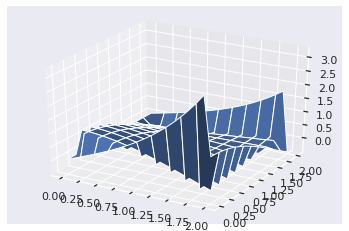

Equation 4


In [14]:
x_axis = [xs] * (N2 + 1)
y_axis = [[ys[i]] * (N1 + 1) for i in range(N2 + 1)]

fig_1 = plt.figure()
ax = fig_1.gca(projection='3d')

window_frame = None
for j in range(M + 1):
    # equation 4
    u_j = [[u_1[m][n][j] for n in range(N2 + 1)] for m in range(N1 + 1)]
    previous_column, window_frame = window_frame, ax.plot_surface(np.array(x_axis), 
                                                                  np.array(y_axis), 
                                                                  np.array(u_j), 
                                                                  rstride=2, 
                                                                  cstride=2)
    if previous_column is not None:
        ax.collections.remove(previous_column)
    plt.pause(.001)
plt.pause(20)
print('Equation 4')

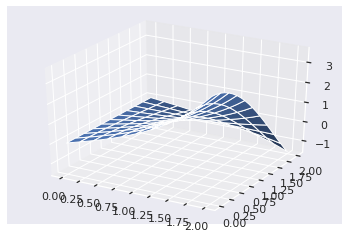

Equation 8-9


In [20]:
x_axis = [xs] * (N2 + 1)
y_axis = [[ys[i]] * (N1 + 1) for i in range(N2 + 1)]

fig_2 = plt.figure()
ax = fig_2.gca(projection='3d')

window_frame = None
for j in range(M + 1):
#     equation 8-9
    u_j = [[analytic[m][n][j] for n in range(N2 + 1)] for m in range(N1 + 1)]

    previous_column, window_frame = window_frame, ax.plot_surface(np.array(x_axis), 
                                                                  np.array(y_axis), 
                                                                  np.array(u_j), 
                                                                  rstride=2, 
                                                                  cstride=2)
    if previous_column != None:
        ax.collections.remove(previous_column)
    plt.pause(.001)
plt.pause(20)

print('Equation 8-9')

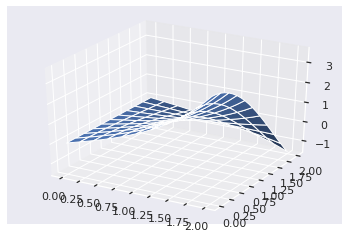

Analytic


In [19]:
x_axis = [xs] * (N2 + 1)
y_axis = [[ys[i]] * (N1 + 1) for i in range(N2 + 1)]

fig_3 = plt.figure()
ax = fig_3.gca(projection='3d')

window_frame = None
for j in range(M + 1):
    #analytic
    u_j = [[analytic[m][n][j] for n in range(N2 + 1)] for m in range(N1 + 1)]
    previous_column, window_frame = window_frame, ax.plot_surface(np.array(x_axis), 
                                                                  np.array(y_axis), 
                                                                  np.array(u_j), 
                                                                  rstride=2, 
                                                                  cstride=2)
    if previous_column is not None:
        ax.collections.remove(previous_column)
    plt.pause(.001)
plt.pause(20)

print('Analytic')